# Result:
 - HCM accounts for the most, HN and other provinces seem to be the same but HN has a high churn rate
 - Agents have almost the same performance, Super market is slightly better
 - Churn rate is quite high close 80%, retain is 20%
 - Shop 1 and 2 are more popular than the rest, but especially the churn is much higher than retain
 - AAA is mainly distributed from 0 to 100, with quite a lot of outliers
 - TIME_TO_CONVERT, SHOP, CITY has an impact on customer retention

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting graph display 
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_csv(r'C:\Users\baolu\Desktop\raw3.csv')
df

,TRAN_ID,USER_ID,CITY,AGENT,STATUS,SHOP_ID,TIME_TO_CONVERT
0,9508197865,617382002,Ha Noi,SUPER_MARKET,churn,2,25.0
1,9534879723,446358434,HCM,CONVINIENCE_STORE,churn,1,371.0
2,9502868333,336774823,HCM,CONVINIENCE_STORE,churn,3,NaN
3,9519944030,610624716,Ha Noi,SUPER_MARKET,churn,2,15.0
4,9521883750,342036649,Others,SUPER_MARKET,churn,2,49.0
...,...,...,...,...,...,...,...
9990,9527278631,605893777,Ha Noi,CONVINIENCE_STORE,churn,1,46.0
9991,9543341533,357886496,HCM,CONVINIENCE_STORE,churn,3,408.0
9992,9530220475,614690794,Ha Noi,SUPER_MARKET,churn,2,217.0
9993,9540442048,612625334,Ha Noi,CONVINIENCE_STORE,churn,1,22.0


---
# Exploratory

### Findings:
- HCM accounts for the most, HN and other provinces seem to be the same
- Agents have almost the same activity, Super market is slightly better
- Churn rate is quite high
- Shop 1 and 2 are more popular than the rest

In [ ]:
cats = ['CITY', 'AGENT', 'STATUS', 'SHOP_ID']

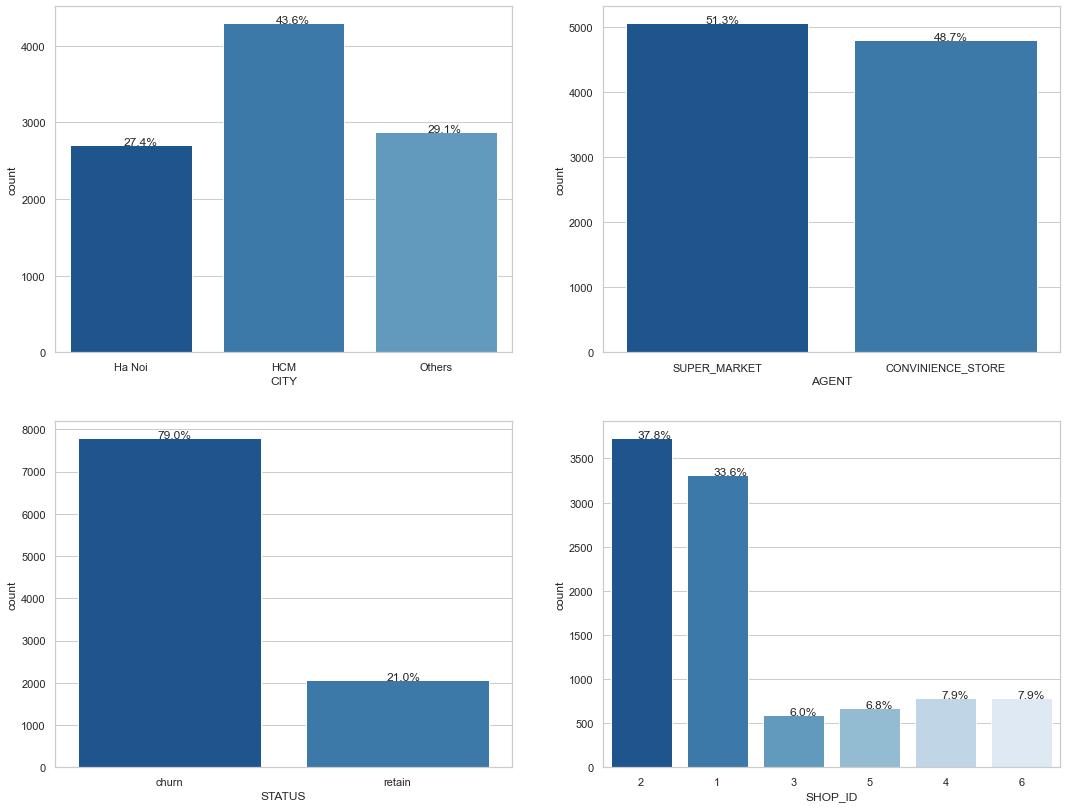

In [134]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

for ax, cat in zip(axes, cats):
    total = float(len(df[cat]))
    sns.countplot(df[cat], ax=ax)
      
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)


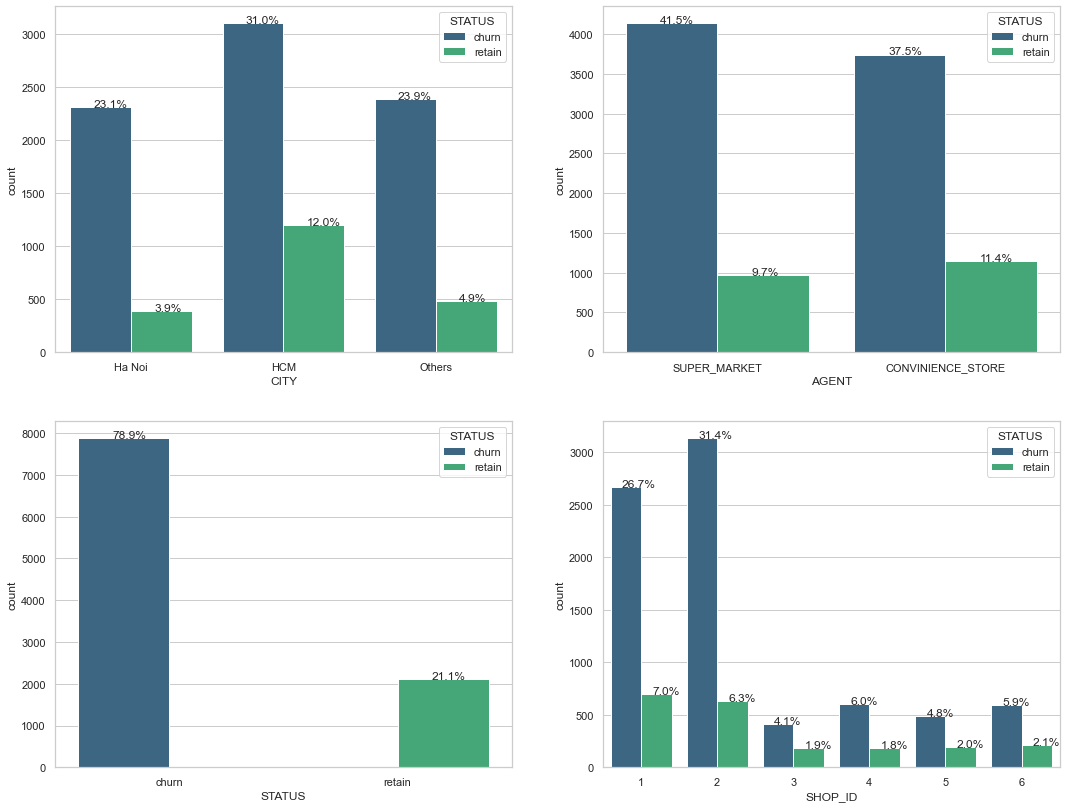

In [2]:
#  Categorical Data

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

for ax, cat in zip(axes, cats):
    total = float(len(df[cat]))
    sns.countplot(df[cat], ax=ax, palette='viridis', hue=df['STATUS'])
      
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

---
### Clean data
 - CITY and TIME_TO_CONVERT have missing values
     - Remove null values in CITY
     - Fill null values with median value in TIME_TO_CONVERT 

In [3]:
df.isnull().sum()

TRAN_ID              0
USER_ID              0
CITY               123
AGENT                0
STATUS               0
SHOP_ID              0
TIME_TO_CONVERT    918
dtype: int64

In [4]:
# Remove null values in CITY
df = df[df['CITY'].notnull()]

In [5]:
# Convert SHOP datatype to str 
df['SHOP_ID'] = df['SHOP_ID'].astype('str')

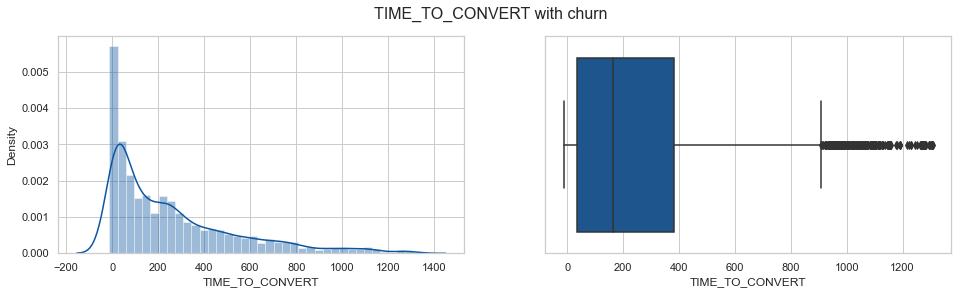

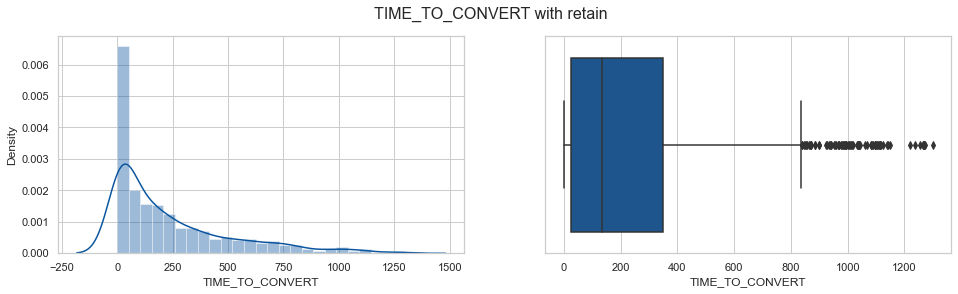

In [6]:
#plot TIME_TO_CONVERT with churn/retain
f, axes = plt.subplots(1, 2, figsize=(16,4))
sns.distplot(df[df['STATUS']=='churn']['TIME_TO_CONVERT'],  ax=axes[0])
sns.boxplot(df[df['STATUS']=='churn']['TIME_TO_CONVERT'], ax=axes[1])
f.suptitle('TIME_TO_CONVERT with churn', fontsize=16)
plt.show()

f, axes = plt.subplots(1, 2, figsize=(16,4))
sns.distplot(df[df['STATUS']=='retain']['TIME_TO_CONVERT'],  ax=axes[0])
sns.boxplot(df[df['STATUS']=='retain']['TIME_TO_CONVERT'], ax=axes[1])
f.suptitle('TIME_TO_CONVERT with retain', fontsize=16)
plt.show()

In [7]:
# Fill null values with median
df['TIME_TO_CONVERT'] = df['TIME_TO_CONVERT'].fillna(df[df['STATUS']=='churn']['TIME_TO_CONVERT'].median())
df['TIME_TO_CONVERT'] = df['TIME_TO_CONVERT'].fillna(df[df['STATUS']=='retain']['TIME_TO_CONVERT'].median())

### Check duplicated

- No duplicated values

In [8]:
df.duplicated(subset=['TRAN_ID','USER_ID']).any()

False

---
### Statical Analysis
- Findings:
 - TIME_TO_CONVERT, SHOP, CITY has an impact on customer retention

In [72]:
df1 = df.copy()

In [73]:
df1.drop(['TRAN_ID', 'USER_ID'], axis=1, inplace=True)

In [74]:
df1.reset_index(inplace=True)

In [75]:
# one-hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder

# get categorical features
cat = df1.select_dtypes(exclude=np.number)
print('Number of unique values of categorical features:\n', cat.nunique())

# use one hot coder
cat_fit = OneHotEncoder(sparse=False).fit(cat)
cat_enc = pd.DataFrame(cat_fit.transform(cat))
cat_enc.columns = cat_fit.get_feature_names(cat.columns)

#merge with numberic data
num = df1['TIME_TO_CONVERT']
df2 = pd.concat([num, cat_enc], axis=1)

Number of unique values of categorical features:
 CITY       3
AGENT      2
STATUS     2
SHOP_ID    6
dtype: int64


In [77]:
df2.drop(columns='STATUS_churn', inplace=True)

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

y = df2['STATUS_retain']
X = df2.drop(columns='STATUS_retain')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

# predictions
pred = dt.predict(X_test)

# evaluate model using RMSE
print('Linear Regression RMSE: ', np.sqrt(mean_squared_error(y_test,pred)))



Linear Regression RMSE:  0.4687716239738045


In [127]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(dt, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=5)